This is some file wrangling to produce some of the data products in this repository.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import nawrapper as nw

import absact_file_util as file_util
from pathlib import Path  # this is Python 3

map_dir = Path('data/private_maps')
abs_q, abs_u, abs_mask, abs_q_wt, abs_u_wt = file_util.get_ABS_maps(
    map_dir / 'abs')
act_t, act_q, act_u, act_t_nwt, act_q_nwt, act_u_nwt = file_util.get_ACT_maps(
    map_dir / 'act', freq='all')
planck_i_1, planck_q_1, planck_u_1 = hp.read_map(
    map_dir / 'planck' / 'planck_256_hm1.fits', field=(0,1,2), verbose=False)
planck_i_2, planck_q_2, planck_u_2 = hp.read_map(
    map_dir / 'planck' / 'planck_256_hm2.fits', field=(0,1,2), verbose=False)

planck_mask_1 = hp.read_map(map_dir / 'planck' / 'planck_mask_1.fits', verbose=False)
planck_mask_2 = hp.read_map(map_dir / 'planck' / 'planck_mask_2.fits', verbose=False)
planck_mask_1_pol = hp.read_map(map_dir / 'planck' / 'planck_mask_1_pol.fits', verbose=False)
planck_mask_2_pol = hp.read_map(map_dir / 'planck' / 'planck_mask_2_pol.fits', verbose=False)

/home/zequnl/Downloads/.conda/envs/ps/lib/python3.8/site-packages/healpy/fitsfunc.py:351: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


Q rms = 199.675224, U rms = 191.583401
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [5]:
from astropy.table import Table

tABS = Table([abs_q, abs_u, abs_mask, abs_q_wt, abs_u_wt], 
          names=('Q', 'U', 'mask', 'Q_weight', 'U_weight'))
tABS.write('ABS.fits', format='fits')

In [6]:
import healpy as hp

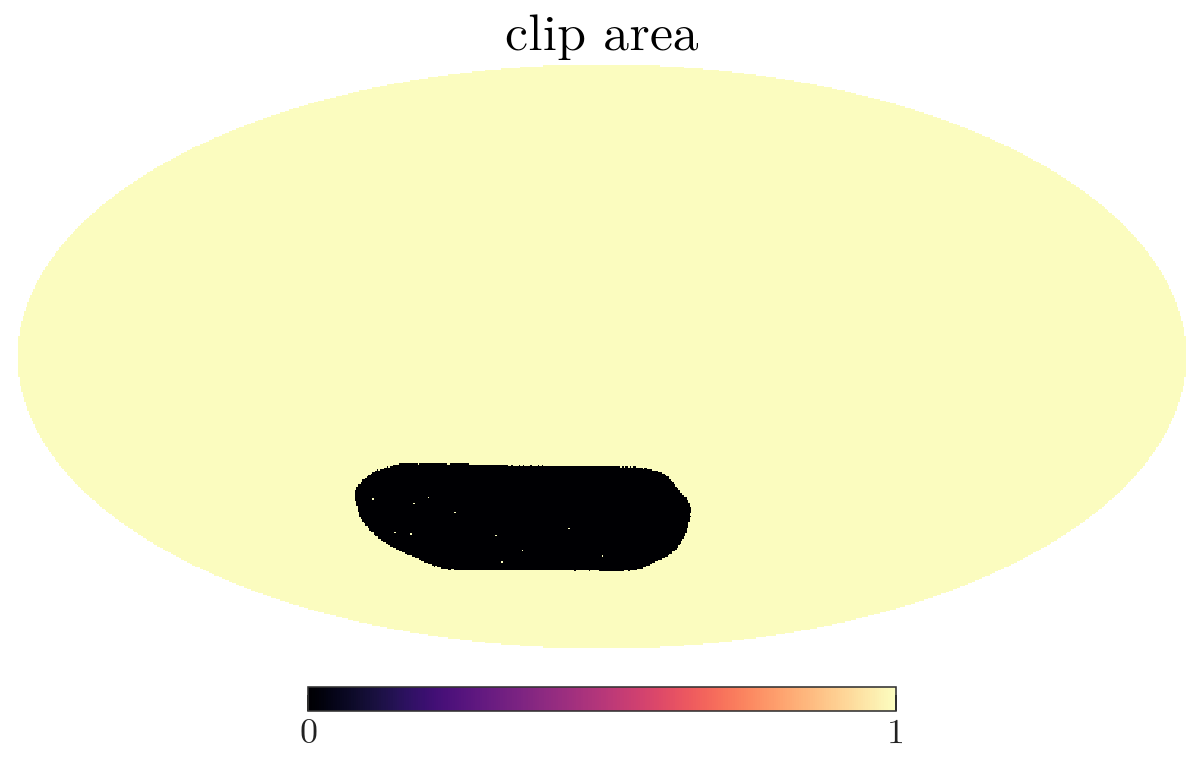

In [7]:
clip = (abs_mask == 0.0)
hp.mollview(clip, title='clip area')

In [8]:
act_t[clip] = 0.0
act_q[clip] = 0.0
act_u[clip] = 0.0

act_t_nwt[clip] = 0.0
act_q_nwt[clip] = 0.0
act_u_nwt[clip] = 0.0

NameError: name 'np' is not defined

In [9]:
tACT = Table([act_t, act_q, act_u, act_t_nwt, act_q_nwt, act_u_nwt], 
          names=('I', 'Q', 'U', 'I_weight', 'Q_weight', 'U_weight'))
tACT.write('data/maps/ACT.fits', format='fits', overwrite=True)

In [15]:
tPlanck1 = Table([planck_i_1, planck_q_1, planck_u_1, planck_mask_1, planck_mask_1_pol], 
          names=('I', 'Q', 'U', 'I_mask', 'QU_mask'))
tPlanck1.write('data/maps/Planck_hm1.fits', format='fits', overwrite=True)

In [16]:
tPlanck2 = Table([planck_i_2, planck_q_2, planck_u_2, planck_mask_2, planck_mask_2_pol], 
          names=('I', 'Q', 'U', 'I_mask', 'QU_mask'))
tPlanck2.write('data/maps/Planck_hm2.fits', format='fits', overwrite=True)